In [49]:
#import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
from kmodes.kmodes import KModes

In [20]:
#styling of the graphs
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [21]:
#reading the data from the csv file
data = np.genfromtxt('app-category.csv', dtype=str, delimiter=',')[:, 0]

data

array(['phoneNumber', '100000', '100000', '100004', '100002', '100001',
       '100003', '100010', '100009', '100001', '100007', '100000',
       '100000', '100005', '100005', '100001', '100009', '100007',
       '100003', '100006', '100002', '100002', '100007', '100009',
       '100006', '100008', '100004', '100000', '100004', '100007',
       '100005', '100010', '100009', '100005', '100005', '100010',
       '100001', '100002', '100003', '100008', '100000', '100002',
       '100000', '100004', '100003', '100001', '100006', '100000',
       '100002', '100002', '100010', '100003', '100008', '100002',
       '100007', '100007', '100000', '100009', '100000', '100008',
       '100004', '100003', '100008', '100008', '100008', '100010',
       '100006', '100002', '100010', '100008', '100008', '100009',
       '100009', '100000', '100004', '100006', '100006', '100005',
       '100008', '100001', '100009', '100010', '100007', '100007',
       '100010', '100001', '100004', '100003', '100006', 

In [29]:
X = np.genfromtxt('app-category.csv', dtype=object, delimiter=',')[:, 2:]
X
#X[:, 0] = float(X[:, 0])#.astype(float)

array([[b'appName', b'appCategory'],
       [b'Gaana', b'Music'],
       [b'Gmail', b'Mail'],
       [b'Youtube', b'Streaming'],
       [b'JioNews', b'News'],
       [b'Gaana', b'Music'],
       [b'JioGames', b'Games'],
       [b'JioNews', b'News'],
       [b'Gaana', b'Music'],
       [b'TOI', b'News'],
       [b'Inshorts', b'News'],
       [b'Youtube', b'Streaming'],
       [b'Gmail', b'Mail'],
       [b'TOI', b'News'],
       [b'JioGames', b'Games'],
       [b'Youtube', b'Streaming'],
       [b'Inshorts', b'News'],
       [b'Gaana', b'Music'],
       [b'Saavn', b'Music'],
       [b'JioNews', b'News'],
       [b'Gmail', b'Mail'],
       [b'JioMail', b'Mail'],
       [b'Youtube', b'Streaming'],
       [b'Gaana', b'Music'],
       [b'JioMail', b'Mail'],
       [b'Youtube', b'Streaming'],
       [b'TOI', b'News'],
       [b'JioNews', b'News'],
       [b'Saavn', b'Music'],
       [b'Gaana', b'Music'],
       [b'Youtube', b'Streaming'],
       [b'JioMail', b'Mail'],
       [b'Inshorts', b'

In [42]:
#Run the k-modes model

kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(X, categorical=[1, 2])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 41.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 41.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 47.0
Run 4, iteration: 2/100, moves: 0, cost: 47.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 41.0
Run 5, iteration: 2/100, moves: 0, cost: 41.0
Best run was number 2


In [43]:
# Print cluster centroids of the trained model.
print(kmodes.cluster_centroids_)

[[b'Youtube' b'Streaming']
 [b'Inshorts' b'News']
 [b'Gmail' b'Mail']
 [b'JioGames' b'Games']
 [b'Saavn' b'Music']]


In [44]:
# Print training statistics
print(kmodes.cost_)
print(kmodes.n_iter_)

41.0
1


In [45]:
#print the results, that is which phone number is added to which cluster
for s, c in zip(data, clusters):
    print("Result: {}, cluster:{}".format(s, c))

Result: phoneNumber, cluster:0
Result: 100000, cluster:4
Result: 100000, cluster:2
Result: 100004, cluster:0
Result: 100002, cluster:1
Result: 100001, cluster:4
Result: 100003, cluster:3
Result: 100010, cluster:1
Result: 100009, cluster:4
Result: 100001, cluster:1
Result: 100007, cluster:1
Result: 100000, cluster:0
Result: 100000, cluster:2
Result: 100005, cluster:1
Result: 100005, cluster:3
Result: 100001, cluster:0
Result: 100009, cluster:1
Result: 100007, cluster:4
Result: 100003, cluster:4
Result: 100006, cluster:1
Result: 100002, cluster:2
Result: 100002, cluster:2
Result: 100007, cluster:0
Result: 100009, cluster:4
Result: 100006, cluster:2
Result: 100008, cluster:0
Result: 100004, cluster:1
Result: 100000, cluster:1
Result: 100004, cluster:4
Result: 100007, cluster:4
Result: 100005, cluster:0
Result: 100010, cluster:2
Result: 100009, cluster:1
Result: 100005, cluster:1
Result: 100005, cluster:3
Result: 100010, cluster:0
Result: 100001, cluster:1
Result: 100002, cluster:4
Result:

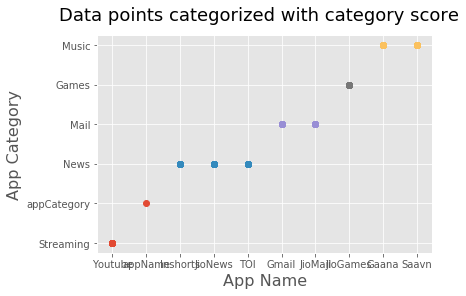

In [46]:
# Plot the results
for i in set(kmodes.labels_):
    index = kmodes.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('App Name', fontsize=16)
    plt.ylabel('App Category', fontsize=16)
plt.show()

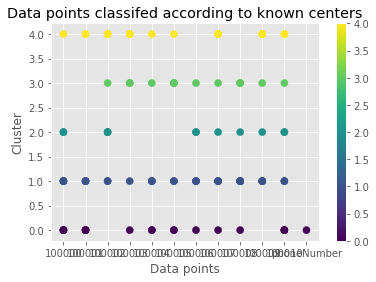

[('phoneNumber', 0), ('100004', 0), ('100000', 0), ('100001', 0), ('100007', 0), ('100008', 0), ('100005', 0), ('100010', 0), ('100003', 0), ('100004', 0), ('100001', 0), ('100010', 0), ('100000', 0), ('100000', 0), ('100010', 0), ('100000', 0), ('100006', 0), ('100001', 0), ('100001', 0), ('100005', 0), ('100002', 1), ('100010', 1), ('100001', 1), ('100007', 1), ('100005', 1), ('100009', 1), ('100006', 1), ('100004', 1), ('100000', 1), ('100009', 1), ('100005', 1), ('100001', 1), ('100008', 1), ('100000', 1), ('100000', 1), ('100006', 1), ('100000', 1), ('100008', 1), ('100007', 1), ('100007', 1), ('100009', 1), ('100008', 1), ('100008', 1), ('100006', 1), ('100002', 1), ('100008', 1), ('100009', 1), ('100004', 1), ('100008', 1), ('100001', 1), ('100004', 1), ('100001', 1), ('100003', 1), ('100010', 1), ('100007', 1), ('100000', 2), ('100000', 2), ('100002', 2), ('100002', 2), ('100006', 2), ('100010', 2), ('100002', 2), ('100008', 2), ('100007', 2), ('100010', 2), ('100006', 2), ('10

In [47]:
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(data, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(data, kmodes.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)

In [55]:
result = zip(X, kmodes.labels_)
sortedR = sorted(result, key=lambda x: x[1])
#print(sortedR)

df = DataFrame(sortedR, columns=['app-cat','cluster'])
df

,app-cat,cluster
0,"[b'appName', b'appCategory']",0
1,"[b'Youtube', b'Streaming']",0
2,"[b'Youtube', b'Streaming']",0
3,"[b'Youtube', b'Streaming']",0
4,"[b'Youtube', b'Streaming']",0
5,"[b'Youtube', b'Streaming']",0
6,"[b'Youtube', b'Streaming']",0
7,"[b'Youtube', b'Streaming']",0
8,"[b'Youtube', b'Streaming']",0
9,"[b'Youtube', b'Streaming']",0
